![figure 11.2](assets/11.2_figure_11.2.png)

[103.48097997  90.91768293 132.63457383  86.69061554  89.83463996
 141.47799585   7.62591138 315.77006681]


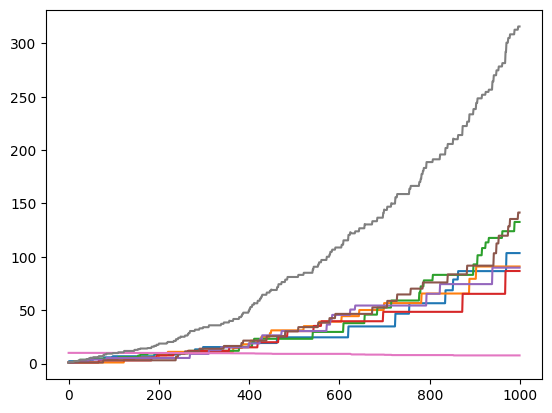

In [3]:
# bairds counter example
import numpy as np

feature_vectors = [
    np.array([2, 0, 0, 0, 0, 0, 0, 1]),
    np.array([0, 2, 0, 0, 0, 0, 0, 1]),
    np.array([0, 0, 2, 0, 0, 0, 0, 1]),
    np.array([0, 0, 0, 2, 0, 0, 0, 1]),
    np.array([0, 0, 0, 0, 2, 0, 0, 1]),
    np.array([0, 0, 0, 0, 0, 2, 0, 1]),
    np.array([0, 0, 0, 0, 0, 0, 1, 2]),
]

actions = ['dashed', 'solid']

def b_policy():
    if np.random.random() < 6/7:
        return 'dashed'
    else:
        return 'solid'

def t_policy():
    return 'solid'

def importance_ratio(action):
    return 7.0 if action == 'solid' else 0.0

def value_function(w, state):
    return np.dot(w, feature_vectors[state])

def get_next_state_and_reward(state, action):
    if action == 'solid':
        return 6, 0
    else:
        return np.random.choice([0, 1, 2, 3, 4, 5]), 0

def train_semi_gradient_td(alpha, gamma, steps):
    w = np.array([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 10.0, 1.0])
    state = 0
    w_tracker = [ [] for _ in range(len(w)) ]
    for _ in range(steps):
        action = b_policy()
        next_state, reward = get_next_state_and_reward(state, action)
        rho = importance_ratio(action)
        delta = reward + gamma * value_function(w, next_state) - value_function(w, state)
        w += alpha * rho * delta * feature_vectors[state]
        state = next_state

        for i in range(len(w)):
            w_tracker[i].append(w[i])

    return w, w_tracker

w, w_tracker = train_semi_gradient_td(alpha=.01, gamma=.99, steps=1000)
print(w)

import matplotlib.pyplot as plt

for i in range(len(w_tracker)):
    plt.plot(w_tracker[i])
plt.show()
